<a href="https://colab.research.google.com/github/akhilesh-kanmanthreddy/Superconductivity_Temperature_Dataframe_Project/blob/main/superconductors_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training

In [ ]:
## Author:
# name: Rahul
# Company : AI Camp Inc.


## Load Pre-processed Data:  

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("superconductors_pp.csv")
df.head()

,range_ThermalConductivity,wtd_gmean_ThermalConductivity,std_atomic_mass,wtd_gmean_Valence,wtd_entropy_ThermalConductivity,gmean_ElectronAffinity,mean_Density,wtd_mean_Valence,std_Density,wtd_range_Valence,critical_temp
0,399.97342,1.049929,55.307695,2.062871,0.193112,60.721493,4428.85725,2.076336,3226.535754,0.854962,94.90
1,399.97342,24.976102,56.763654,2.119268,0.181288,60.721493,5093.10725,2.142857,3580.102554,0.571429,96.40
2,399.97342,0.963755,49.466135,1.959322,0.204537,57.156068,3388.70378,2.000000,3322.165544,0.928571,43.05
3,399.97342,1.113379,54.877137,2.067266,0.189436,60.721493,4956.10725,2.081585,3479.091647,0.822844,89.75
4,399.97342,1.300193,50.424957,2.063461,0.521630,34.735675,4033.48580,2.077042,3207.256758,0.921418,76.35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   range_ThermalConductivity        2294 non-null   float64
 1   wtd_gmean_ThermalConductivity    2294 non-null   float64
 2   std_atomic_mass                  2294 non-null   float64
 3   wtd_gmean_Valence                2294 non-null   float64
 4   wtd_entropy_ThermalConductivity  2294 non-null   float64
 5   gmean_ElectronAffinity           2294 non-null   float64
 6   mean_Density                     2294 non-null   float64
 7   wtd_mean_Valence                 2294 non-null   float64
 8   std_Density                      2294 non-null   float64
 9   wtd_range_Valence                2294 non-null   float64
 10  critical_temp                    2294 non-null   float64
dtypes: float64(11)
memory usage: 197.3 KB


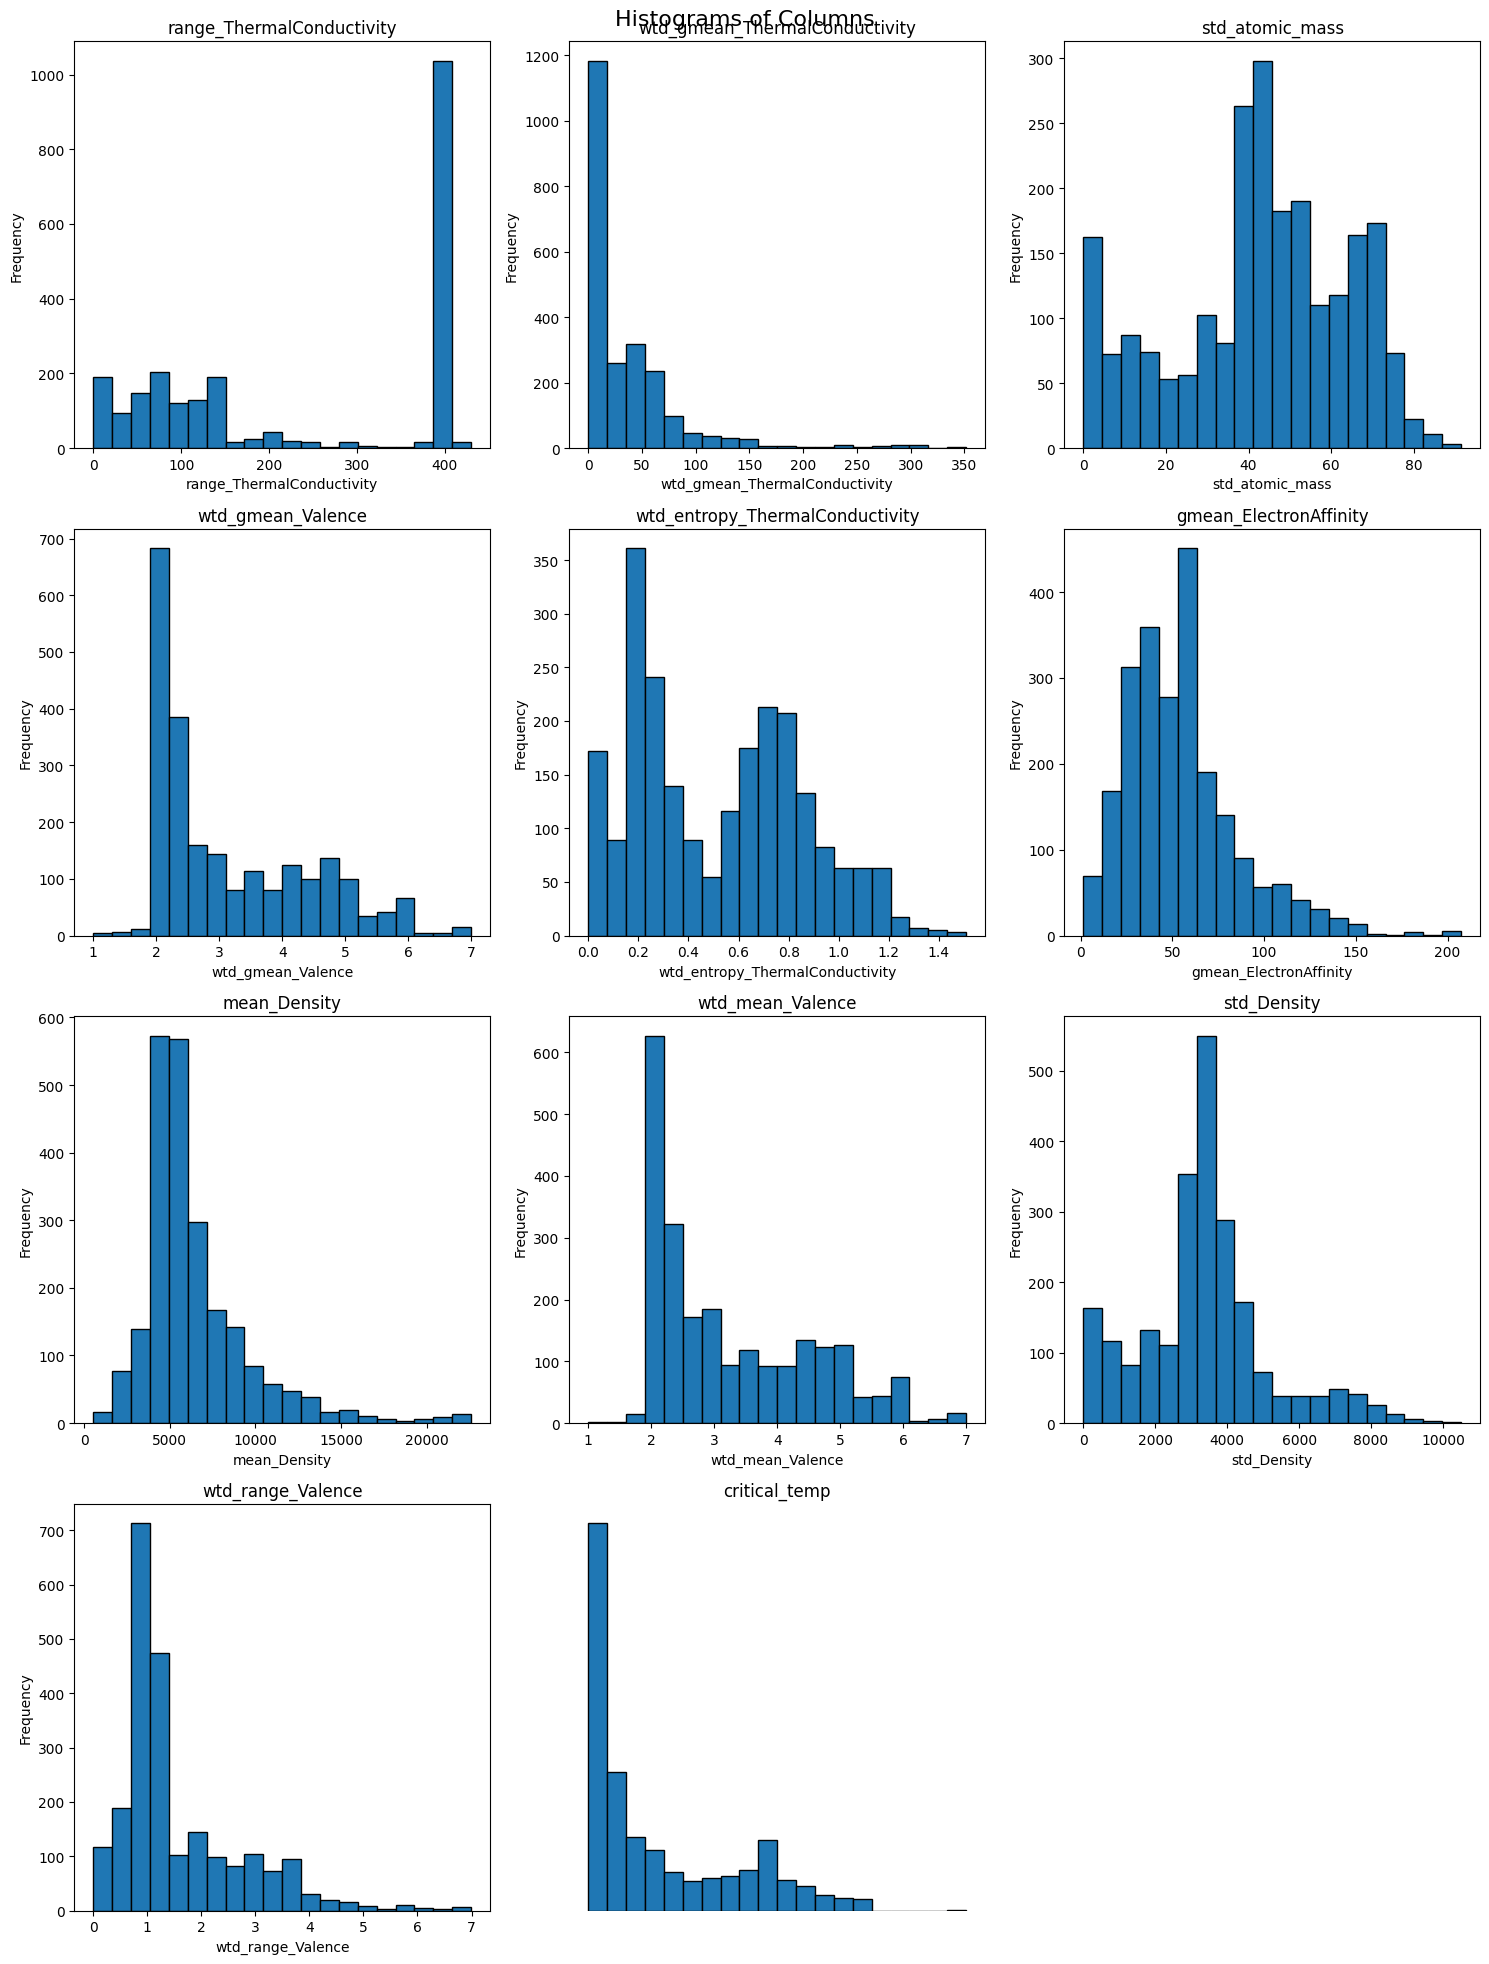

In [ ]:
## print unique values(classes):
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame, let's call it df

# Get the number of columns in the DataFrame (excluding the target column)
num_cols = len(df.columns)

# Calculate the number of rows and columns needed for the subplot grid
num_rows = (num_cols - 1) // 3 + 1
num_cols = min(num_cols, 3)

# Create a new figure and axis objects for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten the axis objects if necessary (to handle cases where num_cols = 1)
if num_rows == 1:
    axs = [axs]

# Loop through each column (excluding the target column) and plot histograms
for i, column in enumerate(df.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx][col_idx]
    ax.hist(df[column], bins=20, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# If there are any remaining empty subplots, remove them
for i in range(len(df.columns) - 1, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axs[row_idx][col_idx].axis('off')

# Add a title for the overall figure
fig.suptitle('Histograms of Columns', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



## Train Test split:

In [ ]:
FEATURES = list(df.columns[0:-1])
TARGET = 'critical_temp'

X = df.filter(items= FEATURES)
y = df.filter(items=[TARGET])

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (2294, 10)
Target: (2294, 1)


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)


## Scalar Tansformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled[0]

array([0.93022662, 0.00158167, 0.43996076, 0.18885524, 0.19429316,
       0.2425796 , 0.20729992, 0.18374384, 0.34240922, 0.16316015])

## Models

In [ ]:

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

#metrics
from sklearn.metrics import mean_squared_error, r2_score

# parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Initialize an empty DataFrame to store the model scores
model_scores_df = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared'])

predictions = {}


# Function to train and evaluate a model and update the DataFrame
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r_squared = r2_score(y_test, y_pred)

    return {
        'Model': model_name,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared': r_squared,
        "y_pred" : y_pred
    }




### Linear Regression

In [ ]:
# Initialize the Linear Regression model
linear_model = LinearRegression()
linear_scores = evaluate_model(linear_model, 'Linear Regression',
                               X_train_scaled, y_train,
                               X_test_scaled, y_test)
model_scores_df = model_scores_df.append(linear_scores, ignore_index=True)

<ipython-input-11-a0e9b61ec61e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores_df = model_scores_df.append(linear_scores, ignore_index=True)


### Decision Tree:

In [ ]:
dt_model = DecisionTreeRegressor()

dt_scores = evaluate_model(dt_model, 'Decision Tree Regressor',
                           X_train_scaled, y_train,
                           X_test_scaled, y_test)
model_scores_df = model_scores_df.append(dt_scores, ignore_index=True)


<ipython-input-12-772c0a9e0aeb>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores_df = model_scores_df.append(dt_scores, ignore_index=True)


### Random Forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_scores = evaluate_model(rf_model, 'Random Forest Regression',
                           X_train_scaled, y_train,
                           X_test_scaled, y_test)
model_scores_df = model_scores_df.append(rf_scores, ignore_index=True)


<ipython-input-10-4319f86f4ce1>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-13-679af0d01e61>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores_df = model_scores_df.append(rf_scores, ignore_index=True)


### MLP Regressor

In [ ]:
# Initialize the Multi-Layer Perceptron Regressor (MLPRegressor) model
mlp_model = MLPRegressor()

mlp_scores = evaluate_model(mlp_model, 'MLPRegressor',
                            X_train_scaled, y_train,
                            X_test_scaled, y_test)

model_scores_df = model_scores_df.append(mlp_scores, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-14-de6313e9c449>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores_df = model_scores_df.append(mlp_scores, ignore_index=True)


### Support Vector Regressor:

In [ ]:
svr_model = SVR()
svr_scores = evaluate_model(svr_model, 'SVR', X_train_scaled, y_train, X_test_scaled, y_test)


model_scores_df = model_scores_df.append(svr_scores, ignore_index=True)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-15-5b065a04a1e4>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores_df = model_scores_df.append(svr_scores, ignore_index=True)


In [ ]:
model_scores_df.sort_values("R-squared", ascending=False)

,Model,Mean Squared Error,Root Mean Squared Error,R-squared,y_pred
2,Random Forest Regression,111.676718,10.567721,0.920005,"[3.2719466666666683, 4.664249999999999, 126.15..."
1,Decision Tree Regressor,205.475919,14.334431,0.852816,"[0.73, 3.2, 127.8, 1.647, 7.075, 21.3, 14.0, 6..."
4,SVR,490.176618,22.139933,0.648883,"[14.770033342981908, 2.1807243945296673, 75.99..."
3,MLPRegressor,556.521787,23.590714,0.601359,"[27.261056023186487, 11.630292522423813, 68.66..."
0,Linear Regression,565.472014,23.779655,0.594948,"[[19.9776785010053], [6.787666635771943], [70...."


## Hyper parameter tunning:

### Decision Tree Regressor:

RSCV: Decision Tree:
{'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_depth': 9, 'criterion': 'friedman_mse'}


<ipython-input-17-ef4d37532949>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores_df = model_scores_df.append(dt_scores, ignore_index=True)


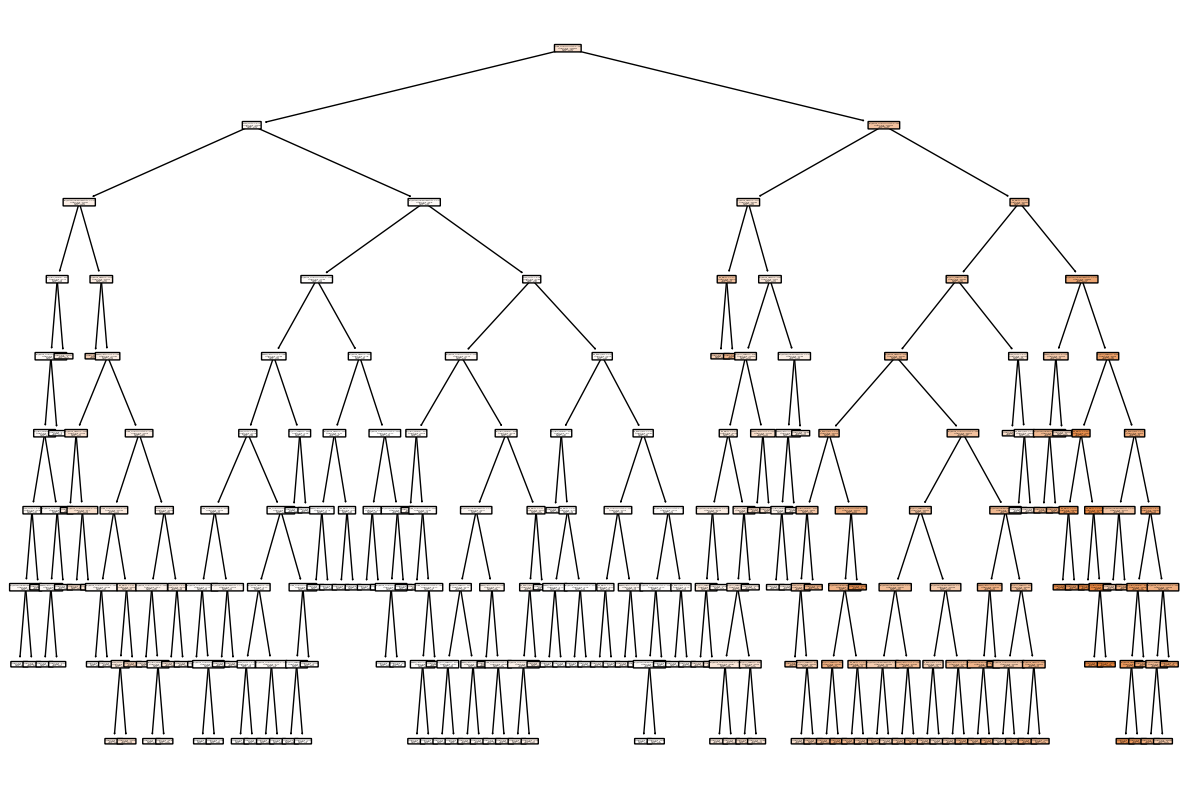

In [ ]:
from sklearn.tree  import plot_tree
dt_regressor = DecisionTreeRegressor()

param_grid = {
    'criterion': ['absolute_error', 'friedman_mse', 'poisson', 'squared_error'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
}

random_search = RandomizedSearchCV(dt_regressor, param_distributions=param_grid,
                                   scoring='r2', n_iter=50, cv=5, random_state=42)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_dtree_model = random_search.best_estimator_

# Display the best hyperparameters
print("RSCV: Decision Tree:")
print(random_search.best_params_)


# Evaluate the best model and store the scores
dt_scores = evaluate_model(best_dtree_model, 'RSCV: Decision Tree',
                           X_train_scaled, y_train,
                           X_test_scaled, y_test)
model_scores_df = model_scores_df.append(dt_scores, ignore_index=True)

# Visualize an best decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_dtree_model, feature_names=FEATURES, filled=True, rounded=True)
plt.show()



In [ ]:
model_scores_df

,Model,Mean Squared Error,Root Mean Squared Error,R-squared,y_pred
0,Linear Regression,565.472014,23.779655,0.594948,"[[19.9776785010053], [6.787666635771943], [70...."
1,Decision Tree Regressor,205.475919,14.334431,0.852816,"[0.73, 3.2, 127.8, 1.647, 7.075, 21.3, 14.0, 6..."
2,Random Forest Regression,111.676718,10.567721,0.920005,"[3.2719466666666683, 4.664249999999999, 126.15..."
3,MLPRegressor,556.521787,23.590714,0.601359,"[27.261056023186487, 11.630292522423813, 68.66..."
4,SVR,490.176618,22.139933,0.648883,"[14.770033342981908, 2.1807243945296673, 75.99..."
5,RSCV: Decision Tree,183.361431,13.541102,0.868657,"[2.6632142857142855, 5.570769230769231, 124.15..."


### GSCV: Random Forest REgressor

In [ ]:

# RandomForestRegressor with hyperparameter tuning using GridSearchCV
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 70, 90],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5,
                           scoring='r2', n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters for Random Forest Regressor:")
print(grid_search.best_params_)


# Evaluate the best model and store the scores
rf_scores = evaluate_model(best_rf_model, 'GSCV: Random Forest Regression',
                           X_train_scaled, y_train,
                           X_test_scaled, y_test)
model_scores_df = model_scores_df.append(rf_scores, ignore_index=True)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Hyperparameters for Random Forest Regressor:
{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 90}


<ipython-input-10-4319f86f4ce1>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-19-1e4a7c565deb>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores_df = model_scores_df.append(rf_scores, ignore_index=True)


In [ ]:
model_scores_df

,Model,Mean Squared Error,Root Mean Squared Error,R-squared,y_pred
0,Linear Regression,565.472014,23.779655,0.594948,"[[19.9776785010053], [6.787666635771943], [70...."
1,Decision Tree Regressor,205.475919,14.334431,0.852816,"[0.73, 3.2, 127.8, 1.647, 7.075, 21.3, 14.0, 6..."
2,Random Forest Regression,111.676718,10.567721,0.920005,"[3.2719466666666683, 4.664249999999999, 126.15..."
3,MLPRegressor,556.521787,23.590714,0.601359,"[27.261056023186487, 11.630292522423813, 68.66..."
4,SVR,490.176618,22.139933,0.648883,"[14.770033342981908, 2.1807243945296673, 75.99..."
5,RSCV: Decision Tree,183.361431,13.541102,0.868657,"[2.6632142857142855, 5.570769230769231, 124.15..."
6,GSCV: Random Forest Regression,109.627578,10.470319,0.921473,"[4.627665079365079, 5.272202061688313, 125.538..."


### GSCV: MLP Regressor:

In [ ]:
mlp_model = MLPRegressor(random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), ],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid,
                           scoring='r2', cv=3, n_jobs=-1, verbose=4)
grid_search.fit(X_train_scaled, y_train)

best_mlp_model = grid_search.best_estimator_
best_params = grid_search.best_params_


# Display the best hyperparameters
print("Best Hyperparameters for MLP REgressor:")
print(best_params)


# Evaluate the best model and store the scores
mlp_scores = evaluate_model(best_mlp_model, 'GSCV: MLP Regression',
                           X_train_scaled, y_train,
                           X_test_scaled, y_test)
model_scores_df = model_scores_df.append(mlp_scores, ignore_index=True)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyperparameters for MLP REgressor:
{'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-21-30f7f0ec6209>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores_df = model_scores_df.append(mlp_scores, ignore_index=True)


In [ ]:
model_scores_df

,Model,Mean Squared Error,Root Mean Squared Error,R-squared,y_pred
0,Linear Regression,565.472014,23.779655,0.594948,"[[19.9776785010053], [6.787666635771943], [70...."
1,Decision Tree Regressor,205.475919,14.334431,0.852816,"[0.73, 3.2, 127.8, 1.647, 7.075, 21.3, 14.0, 6..."
2,Random Forest Regression,111.676718,10.567721,0.920005,"[3.2719466666666683, 4.664249999999999, 126.15..."
3,MLPRegressor,556.521787,23.590714,0.601359,"[27.261056023186487, 11.630292522423813, 68.66..."
4,SVR,490.176618,22.139933,0.648883,"[14.770033342981908, 2.1807243945296673, 75.99..."
5,RSCV: Decision Tree,183.361431,13.541102,0.868657,"[2.6632142857142855, 5.570769230769231, 124.15..."
6,GSCV: Random Forest Regression,109.627578,10.470319,0.921473,"[4.627665079365079, 5.272202061688313, 125.538..."
7,GSCV: MLP Regression,173.984441,13.190316,0.875374,"[6.51351262974205, 2.4263283780158837, 121.143..."


## Visualizations

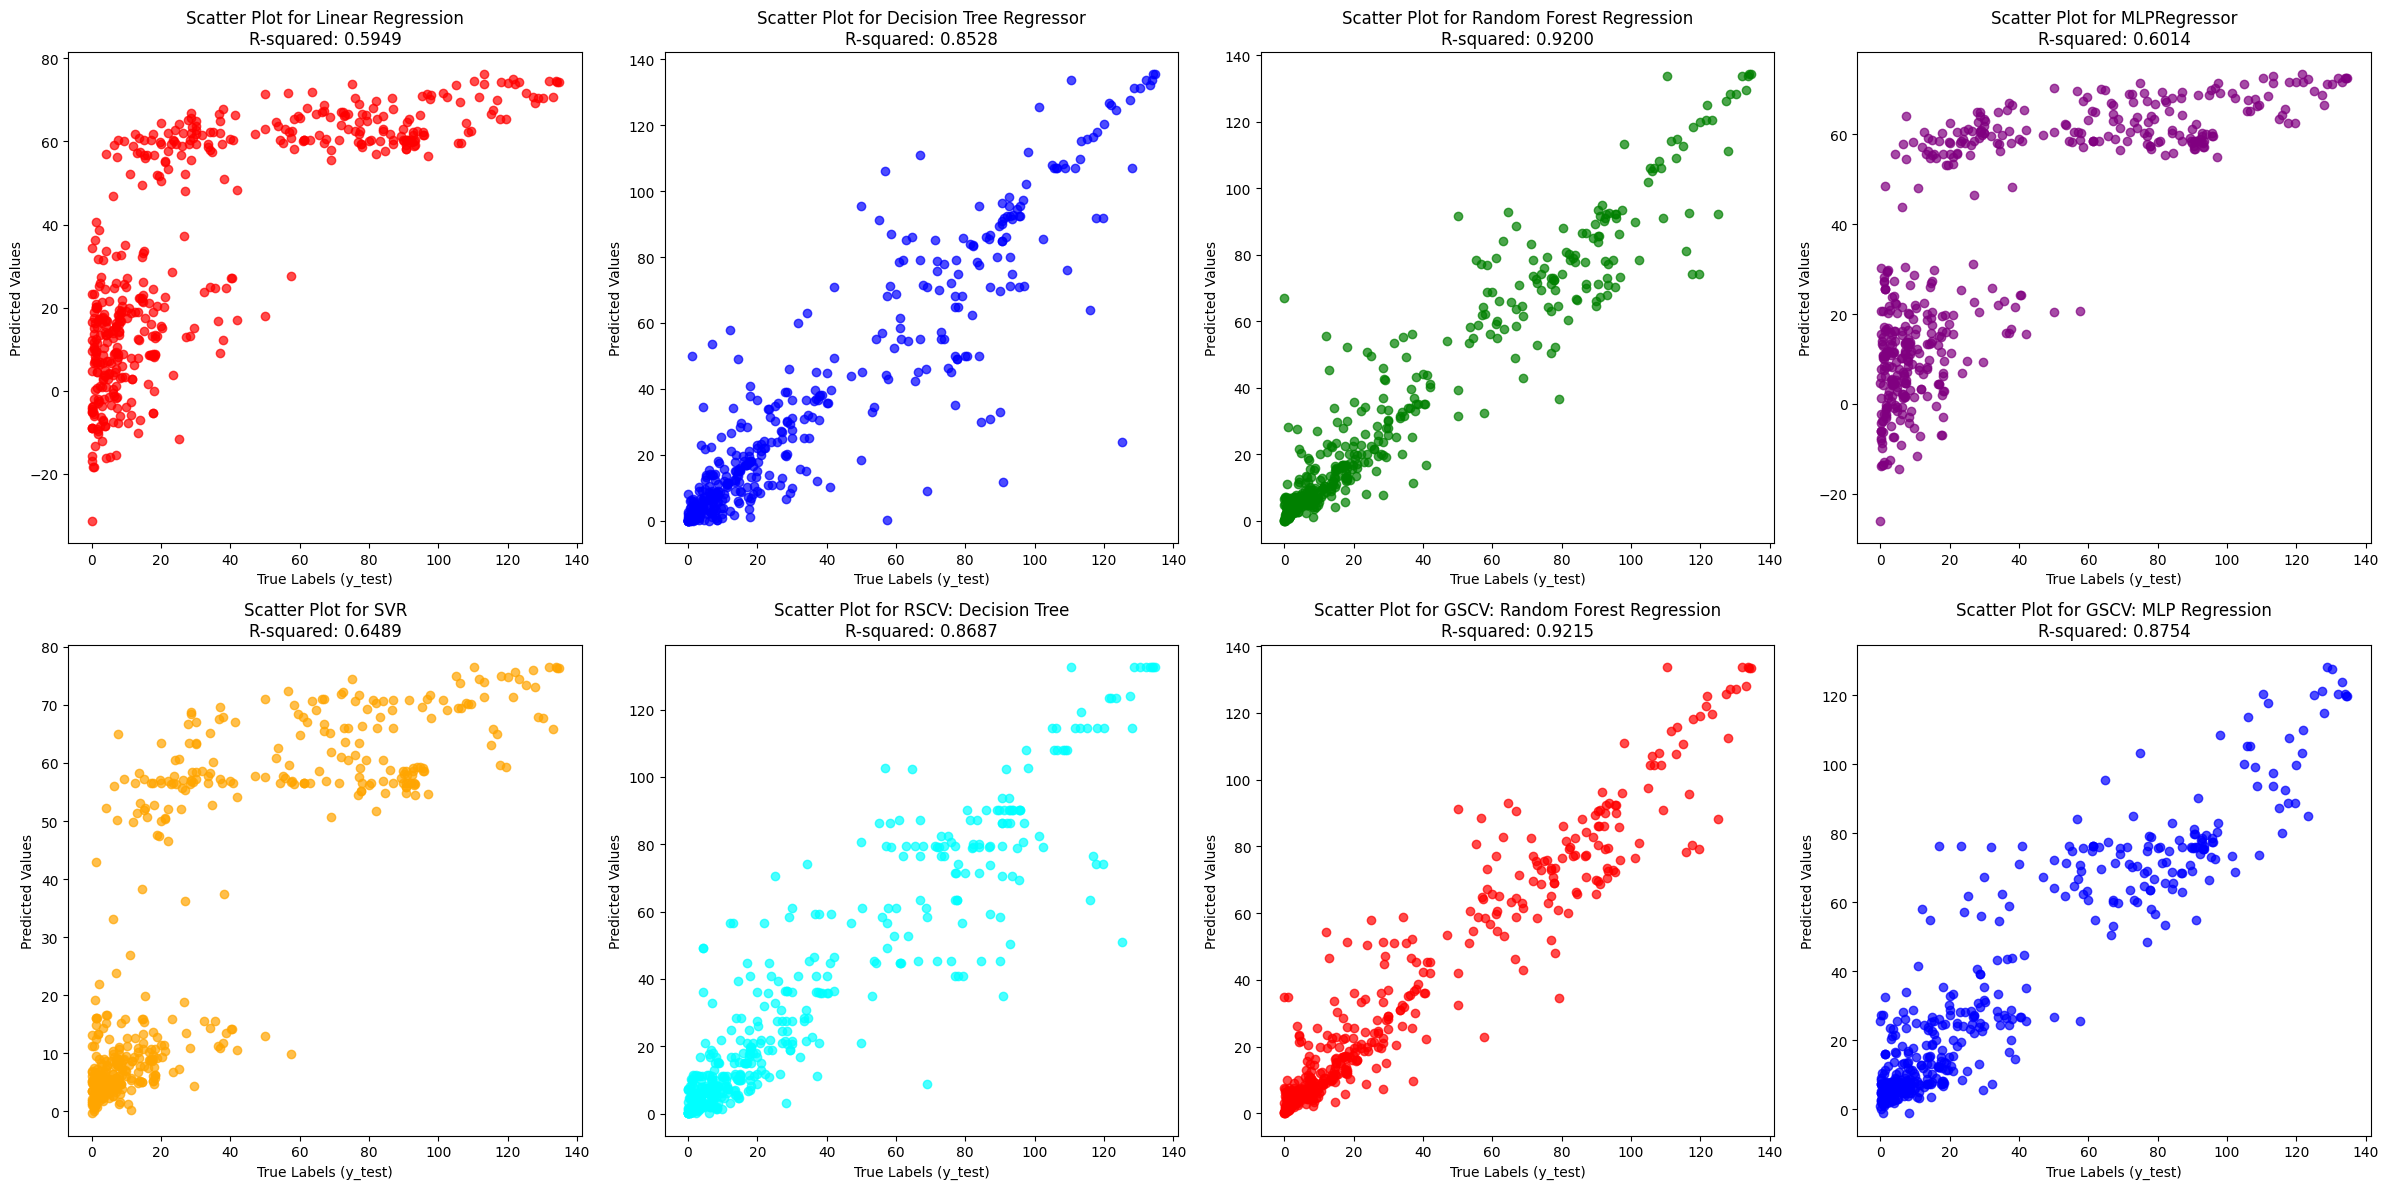

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assuming you have already defined the DataFrame 'model_scores_df' containing model results

def create_scatter_plot(model_name, y_test, y_pred, r_squared, color):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color=color, alpha=0.7)
    plt.xlabel("True Labels (y_test)")
    plt.ylabel("Predicted Values")
    plt.title(f"Scatter Plot for {model_name}\nR-squared: {r_squared:.4f}")
    plt.show()

def scatter_plot_subplots(df):
    num_plots = len(df)
    rows = int(math.sqrt(num_plots))  # Number of rows in the grid
    cols = math.ceil(num_plots / rows)  # Number of columns in the grid
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))  # Adjust the size here

    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']  # Add more colors if needed

    for i, row in model_scores_df.iterrows():
        model_name = row['Model']
        r_squared = row['R-squared']
        y_pred = row['y_pred']
        color = colors[i % len(colors)]

        ax = axs[i // cols, i % cols] if num_plots > 1 else axs  # If only one plot, use axs directly
        ax.scatter(y_test, y_pred, color=color, alpha=0.7)
        ax.set_xlabel("True Labels (y_test)")
        ax.set_ylabel("Predicted Values")
        ax.set_title(f"Scatter Plot for {model_name}\nR-squared: {r_squared:.4f}")

    # Remove any remaining empty subplots
    for i in range(num_plots, rows * cols):
        fig.delaxes(axs[i // cols, i % cols])

    plt.tight_layout()
    plt.show()


# Call the function to create the subplot with dynamically decided grid layout
scatter_plot_subplots(model_scores_df)
